In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [56]:
df=pd.read_csv('kyphosis-Copy1.csv')

In [57]:
df.head() 
# age is on month 
# Number is number of vertebrae
# start is the first verterbrae

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


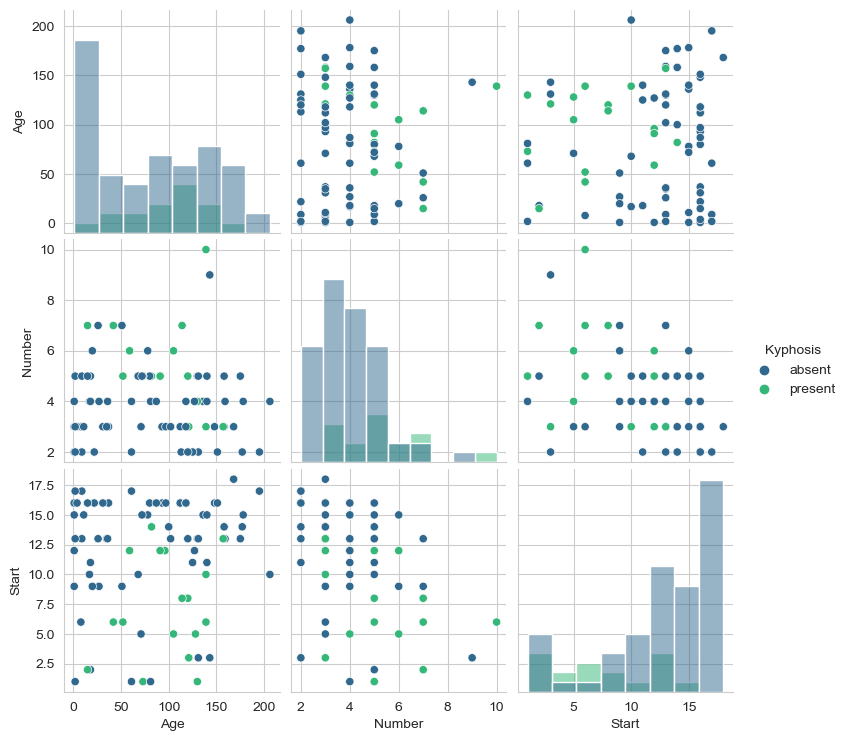

In [59]:
sns.pairplot(df,hue='Kyphosis',palette='viridis',diag_kind='hist')

In [60]:
X=df.drop(['Kyphosis'],axis=1)
y=df['Kyphosis']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

In [62]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
predictions=dtree.predict(X_test)

In [64]:
print(classification_report(y_test,predictions),'\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.70      0.74      0.72        19
     present       0.29      0.25      0.27         8

    accuracy                           0.59        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.58      0.59      0.58        27
 

[[14  5]
 [ 6  2]]


In [65]:
random_forest=RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
predictions_2=random_forest.predict(X_test)

In [66]:
print(classification_report(y_test,predictions_2),'\n')
print(confusion_matrix(y_test,predictions_2))

              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        19
     present       1.00      0.25      0.40         8

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27
 

[[19  0]
 [ 6  2]]
